In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
file_path = "ChampSim_Customized-master/results_10M/BFS_61B.trace.gz-bimodal-no-risk5-risk5-risk5-no-no-no-no-lru-srrip-srrip-srrip-lru-lru-lru-1core.txt"

In [30]:
ignore_list = []
with open(file_path) as file:
    line_num = 0
    while(True):
        line = file.readline()
        if not line:
            break
        elif len(line.strip().split()) != 4:
            ignore_list.append(line_num)
        else:
            ls = line.strip().split()
            try:
                ls[0] = int(ls[0])
                ls[1] = int(ls[1])
                ls[2] = int(ls[2])
                if ls[3] not in ["new ip", "CS", "GS", "CPLX", "NL", "protect"]:
                    ignore_list.append(line_num)
            except:
                ignore_list.append(line_num)
        line_num+=1

In [31]:
ignore_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 30,
 31,
 32,
 33,
 96541,
 192354,
 288157,
 383970,
 479779,
 575592,
 593317,
 593318,
 593319,
 593320,
 593321,
 593322,
 593323,
 593324,
 593325,
 593326,
 593327,
 593328,
 593329,
 593330,
 593331,
 593332,
 593997,
 593998,
 593999,
 594000,
 594001,
 594002,
 594003,
 594004,
 594005,
 594006,
 594007,
 594008,
 594009,
 594010,
 594011,
 594012,
 594013,
 594014,
 594015,
 594016,
 594017,
 594018,
 594019,
 594020,
 594021,
 594022,
 594023,
 594024,
 594025,
 594026,
 594027,
 594028,
 594029,
 594030,
 594031,
 594032,
 594033,
 594035,
 594036,
 594037,
 594038,
 594039,
 594040,
 594041,
 594042,
 594043,
 594044,
 594045,
 594046,
 594047,
 594048,
 594049,
 594050,
 594051,
 594052,
 594053,
 594055,
 594056,
 594068,
 594072,
 594073,
 594074,
 594075,
 594077,
 594082,
 594083,
 594085,
 594087,
 594089,
 594092,
 594094,
 594095,
 594096,
 594099,
 594101,
 594102,
 594

In [32]:
data = pd.read_csv(file_path, sep = " ", skiprows= ignore_list, names= ["ip", "address","pref_address", "type"])

In [33]:
data

,ip,address,pref_address,type
0,94754910594332,1480575038821,1480575038822,CS
1,94754910594332,1480575038821,1480575038823,CS
2,94754910594332,1480575038821,1480575038824,CS
3,94754910594332,1480575038822,1480575038823,CS
4,94754910594332,1480575038822,1480575038824,CS
...,...,...,...,...
1793963,94754910593134,1480568235075,1480568235076,CS
1793964,94754910593134,1480568235075,1480568235077,CS
1793965,94754910593134,1480568235075,1480568235078,CS
1793966,94754910593673,1480568235074,1480568235076,CPLX


In [34]:
length = data.shape[0]
length

1793968

In [35]:
# data = data - data.mean()
# data = data/data.std()

In [36]:
# data.mean()

In [37]:
reqd_data = data[length//2:].reset_index(drop = True)

In [38]:
reqd_data

,ip,address,pref_address,type
0,94754910593692,1480574771795,1480574771795,protect
1,94754910593692,1480574837517,1480574837517,protect
2,94754910593123,1480560635719,1480560635720,GS
3,94754910593123,1480560635719,1480560635721,GS
4,94754910593134,1480568035027,1480568035038,CPLX
...,...,...,...,...
896979,94754910593134,1480568235075,1480568235076,CS
896980,94754910593134,1480568235075,1480568235077,CS
896981,94754910593134,1480568235075,1480568235078,CS
896982,94754910593673,1480568235074,1480568235076,CPLX


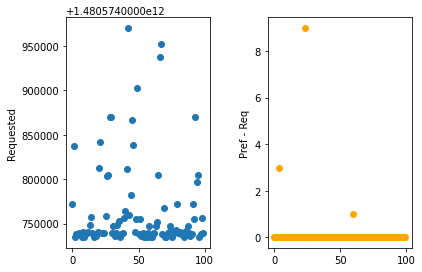

                ip        address   pref_address     type
0   94754910593692  1480574771795  1480574771795  protect
1   94754910593692  1480574837517  1480574837517  protect
2   94754910593692  1480574735116  1480574735116  protect
3   94754910593692  1480574738464  1480574738464  protect
4   94754910593692  1480574738484  1480574738487     CPLX
5   94754910593692  1480574739189  1480574739189  protect
6   94754910593692  1480574738953  1480574738953  protect
7   94754910593692  1480574735108  1480574735108  protect
8   94754910593692  1480574740200  1480574740200  protect
9   94754910593692  1480574734608  1480574734608  protect
10  94754910593692  1480574738964  1480574738964  protect
11  94754910593692  1480574739073  1480574739073  protect
12  94754910593692  1480574740300  1480574740300  protect
13  94754910593692  1480574748436  1480574748436  protect
14  94754910593692  1480574757128  1480574757128  protect
15  94754910593692  1480574739080  1480574739080  protect
16  9475491059

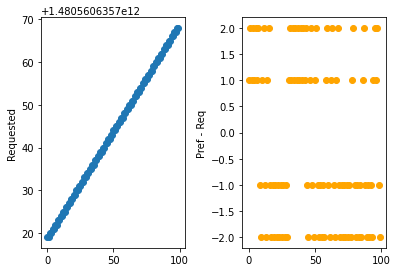

                ip        address   pref_address type
0   94754910593123  1480560635719  1480560635720   GS
1   94754910593123  1480560635719  1480560635721   GS
2   94754910593123  1480560635720  1480560635721   GS
3   94754910593123  1480560635720  1480560635722   GS
4   94754910593123  1480560635721  1480560635722   GS
5   94754910593123  1480560635721  1480560635723   GS
6   94754910593123  1480560635722  1480560635723   GS
7   94754910593123  1480560635722  1480560635724   GS
8   94754910593123  1480560635723  1480560635722   GS
9   94754910593123  1480560635723  1480560635721   GS
10  94754910593123  1480560635724  1480560635725   GS
11  94754910593123  1480560635724  1480560635726   GS
12  94754910593123  1480560635725  1480560635724   GS
13  94754910593123  1480560635725  1480560635723   GS
14  94754910593123  1480560635726  1480560635727   GS
15  94754910593123  1480560635726  1480560635728   GS
16  94754910593123  1480560635727  1480560635726   GS
17  94754910593123  14805606

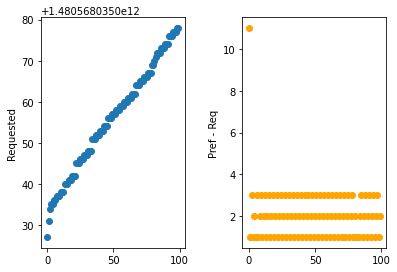

                ip        address   pref_address  type
0   94754910593134  1480568035027  1480568035038  CPLX
1   94754910593134  1480568035031  1480568035032    NL
2   94754910593134  1480568035034  1480568035037  CPLX
3   94754910593134  1480568035035  1480568035036  CPLX
4   94754910593134  1480568035035  1480568035037  CPLX
5   94754910593134  1480568035036  1480568035037  CPLX
6   94754910593134  1480568035036  1480568035039  CPLX
7   94754910593134  1480568035037  1480568035038    CS
8   94754910593134  1480568035037  1480568035039    CS
9   94754910593134  1480568035037  1480568035040    CS
10  94754910593134  1480568035038  1480568035039    CS
11  94754910593134  1480568035038  1480568035040    CS
12  94754910593134  1480568035038  1480568035041    CS
13  94754910593134  1480568035040  1480568035041    CS
14  94754910593134  1480568035040  1480568035042    CS
15  94754910593134  1480568035040  1480568035043    CS
16  94754910593134  1480568035041  1480568035042    CS
17  947549

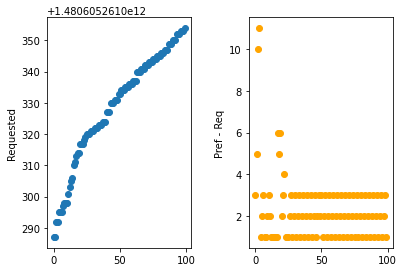

                ip        address   pref_address  type
0   94754910593688  1480605261287  1480605261290  CPLX
1   94754910593688  1480605261287  1480605261292  CPLX
2   94754910593688  1480605261292  1480605261302  CPLX
3   94754910593688  1480605261292  1480605261303  CPLX
4   94754910593688  1480605261295  1480605261296  CPLX
5   94754910593688  1480605261295  1480605261297  CPLX
6   94754910593688  1480605261295  1480605261298  CPLX
7   94754910593688  1480605261297  1480605261298    NL
8   94754910593688  1480605261298  1480605261299  CPLX
9   94754910593688  1480605261298  1480605261300  CPLX
10  94754910593688  1480605261298  1480605261301  CPLX
11  94754910593688  1480605261301  1480605261303  CPLX
12  94754910593688  1480605261303  1480605261304    NL
13  94754910593688  1480605261305  1480605261306    NL
14  94754910593688  1480605261306  1480605261307    NL
15  94754910593688  1480605261310  1480605261311    NL
16  94754910593688  1480605261311  1480605261312    NL
17  947549

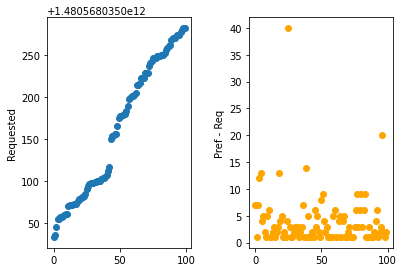

                ip        address   pref_address  type
0   94754910593673  1480568035033  1480568035040  CPLX
1   94754910593673  1480568035036  1480568035037    NL
2   94754910593673  1480568035045  1480568035052  CPLX
3   94754910593673  1480568035055  1480568035067  CPLX
4   94754910593673  1480568035055  1480568035068  CPLX
5   94754910593673  1480568035057  1480568035061  CPLX
6   94754910593673  1480568035057  1480568035062  CPLX
7   94754910593673  1480568035058  1480568035060  CPLX
8   94754910593673  1480568035060  1480568035061    NL
9   94754910593673  1480568035061  1480568035066  CPLX
10  94754910593673  1480568035061  1480568035067  CPLX
11  94754910593673  1480568035070  1480568035071  CPLX
12  94754910593673  1480568035072  1480568035073  CPLX
13  94754910593673  1480568035072  1480568035074  CPLX
14  94754910593673  1480568035072  1480568035075  CPLX
15  94754910593673  1480568035073  1480568035074  CPLX
16  94754910593673  1480568035073  1480568035075  CPLX
17  947549

In [39]:
unq_ip = reqd_data["ip"].unique()
for ind,ip in enumerate(unq_ip):
    temp = reqd_data[reqd_data["ip"] == ip].reset_index(drop = True)
    if(temp.shape[0]<500):
        continue
    temp = temp[0:100].reset_index(drop = True)
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.scatter(np.arange(temp.shape[0]),temp["address"], label = "addr")
    ax1.set_ylabel("Requested")
    ax2.scatter(np.arange(temp.shape[0]),temp["pref_address"]-temp["address"], label = "pref_addr", c= "orange")
    ax2.set_ylabel("Pref - Req")
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    print(temp[0:20])
    

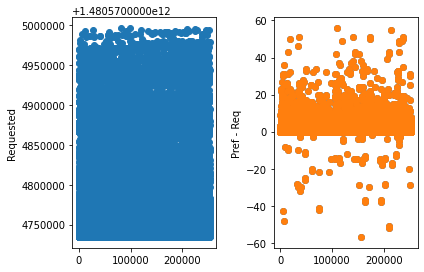

                    ip        address   pref_address     type
0       94754910593692  1480574771795  1480574771795  protect
1       94754910593692  1480574837517  1480574837517  protect
2       94754910593692  1480574735116  1480574735116  protect
3       94754910593692  1480574738464  1480574738464  protect
4       94754910593692  1480574738484  1480574738487     CPLX
...                ...            ...            ...      ...
252581  94754910593692  1480574743455  1480574743455  protect
252582  94754910593692  1480574740507  1480574740507  protect
252583  94754910593692  1480574743459  1480574743459  protect
252584  94754910593692  1480574776475  1480574776475  protect
252585  94754910593692  1480574806051  1480574806051  protect

[252586 rows x 4 columns]


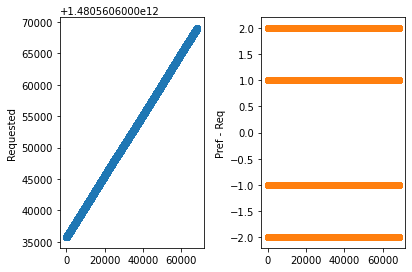

                   ip        address   pref_address type
0      94754910593123  1480560635719  1480560635720   GS
1      94754910593123  1480560635719  1480560635721   GS
2      94754910593123  1480560635720  1480560635721   GS
3      94754910593123  1480560635720  1480560635722   GS
4      94754910593123  1480560635721  1480560635722   GS
...               ...            ...            ...  ...
68352  94754910593123  1480560669058  1480560669060   GS
68353  94754910593123  1480560669059  1480560669058   GS
68354  94754910593123  1480560669059  1480560669057   GS
68355  94754910593123  1480560669060  1480560669059   GS
68356  94754910593123  1480560669060  1480560669058   GS

[68357 rows x 4 columns]


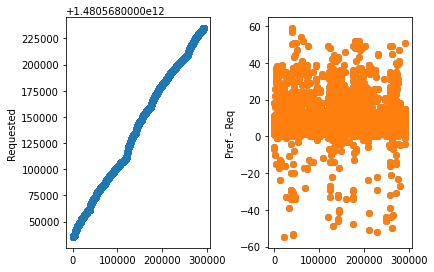

                    ip        address   pref_address  type
0       94754910593134  1480568035027  1480568035038  CPLX
1       94754910593134  1480568035031  1480568035032    NL
2       94754910593134  1480568035034  1480568035037  CPLX
3       94754910593134  1480568035035  1480568035036  CPLX
4       94754910593134  1480568035035  1480568035037  CPLX
...                ...            ...            ...   ...
292073  94754910593134  1480568235074  1480568235076    CS
292074  94754910593134  1480568235074  1480568235077    CS
292075  94754910593134  1480568235075  1480568235076    CS
292076  94754910593134  1480568235075  1480568235077    CS
292077  94754910593134  1480568235075  1480568235078    CS

[292078 rows x 4 columns]


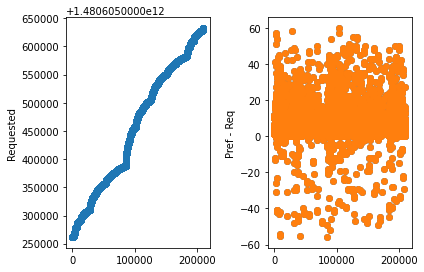

                    ip        address   pref_address  type
0       94754910593688  1480605261287  1480605261290  CPLX
1       94754910593688  1480605261287  1480605261292  CPLX
2       94754910593688  1480605261292  1480605261302  CPLX
3       94754910593688  1480605261292  1480605261303  CPLX
4       94754910593688  1480605261295  1480605261296  CPLX
...                ...            ...            ...   ...
209661  94754910593688  1480605633006  1480605633008    CS
209662  94754910593688  1480605633006  1480605633009    CS
209663  94754910593688  1480605633007  1480605633008    CS
209664  94754910593688  1480605633007  1480605633009    CS
209665  94754910593688  1480605633007  1480605633010    CS

[209666 rows x 4 columns]


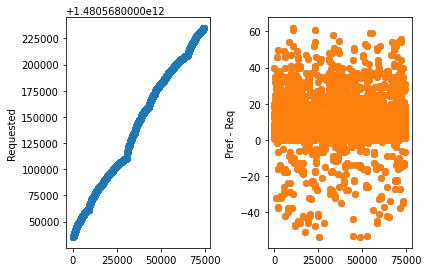

                   ip        address   pref_address  type
0      94754910593673  1480568035033  1480568035040  CPLX
1      94754910593673  1480568035036  1480568035037    NL
2      94754910593673  1480568035045  1480568035052  CPLX
3      94754910593673  1480568035055  1480568035067  CPLX
4      94754910593673  1480568035055  1480568035068  CPLX
...               ...            ...            ...   ...
74292  94754910593673  1480568235064  1480568235068  CPLX
74293  94754910593673  1480568235071  1480568235072    NL
74294  94754910593673  1480568235073  1480568235074  CPLX
74295  94754910593673  1480568235073  1480568235076  CPLX
74296  94754910593673  1480568235074  1480568235076  CPLX

[74297 rows x 4 columns]


In [42]:
unq_ip = reqd_data["ip"].unique()
for ind,ip in enumerate(unq_ip):
    temp = reqd_data[reqd_data["ip"] == ip].reset_index(drop = True)
    if(temp.shape[0]<500):
        continue
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.set_ylabel("Requested")
    ax1.scatter(np.arange(temp.shape[0]),temp["address"], label = "addr")
    ax2.scatter(np.arange(temp.shape[0]),temp["pref_address"]-temp["address"], label = "pref_addr")
    ax2.scatter(np.arange(temp.shape[0]),temp["pref_address"]-temp["address"], label = "pref_addr")
    ax2.set_ylabel("Pref - Req")
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    
    plt.show()
    print(temp)
    